# **Importing Modules and Libraries**

In [25]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

In [26]:
data = pd.read_csv('/content/Modified_SQL_Dataset.csv')



In [27]:
data.head(n=5)


,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [28]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['Label'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['Label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")


Label
0    19537
1    11382
Name: count, dtype: int64
Jumlah kelas unik: 2


In [29]:
data.shape


(30919, 2)

# **Data Visualization**

In [30]:
print(data.columns)


Index(['Query', 'Label'], dtype='object')


In [31]:
print(data['Label'].value_counts())


Label
0    19537
1    11382
Name: count, dtype: int64


Index(['Query', 'Label'], dtype='object')
Label
normal         19537
injeksi SQL    11382
Name: count, dtype: int64
Jumlah kelas unik: 2


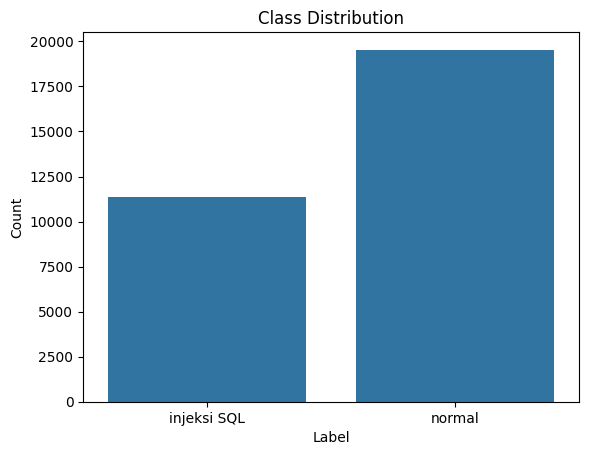

<ipython-input-32-8d39e36e7e6a>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'normal': 0, 'injeksi SQL': 1})


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check column names
print(data.columns)

# Replace 0 and 1 with 'normal' and 'DDoS'
data['Label'] = data['Label'].replace({0: 'normal', 1: 'injeksi SQL'})

# Visualize the class distribution
kelas = data['Label'].value_counts()
print(kelas)

jumlah_kelas = data['Label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

# Visualize the class distribution
sns.countplot(x='Label', data=data)  # Adjust 'Label' if needed
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Convert back to numerical labels for modeling
data['Label'] = data['Label'].replace({'normal': 0, 'injeksi SQL': 1})


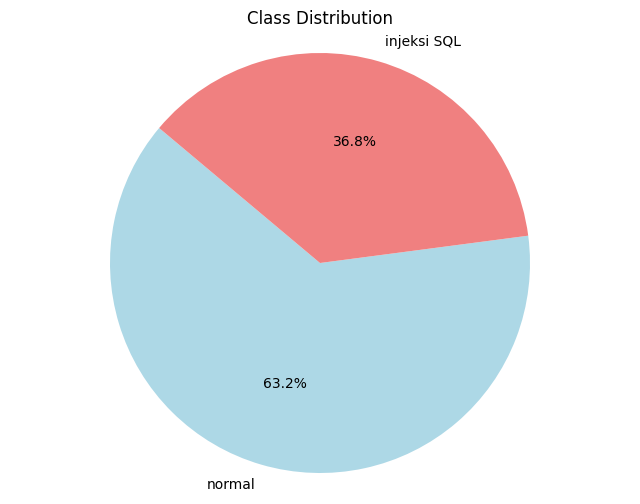

In [33]:
# Visualize the class distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas, labels=kelas.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


# **DATA SPLITTING**

In [34]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data.drop('Label', axis=1)  # Fitur (semua kolom kecuali 'Label')
y = data['Label']                # Variabel target (kolom 'Label')

# Membagi data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y, test_size=0.2, random_state=50)

# Menampilkan informasi tentang ukuran set
print(f'Ukuran set pelatihan: {X_train_bin.shape[0]}')
print(f'Ukuran set pengujian: {X_test_bin.shape[0]}')


Ukuran set pelatihan: 24735
Ukuran set pengujian: 6184


In [36]:
# Verify the shapes of the resulting datasets
print(f"Training data shape: {X_train_bin.shape}")
print(f"Testing data shape: {X_test_bin.shape}")
print(f"Training labels shape: {y_train_bin.shape}")
print(f"Testing labels shape: {y_test_bin.shape}")


Training data shape: (24735, 1)
Testing data shape: (6184, 1)
Training labels shape: (24735,)
Testing labels shape: (6184,)


ini dirunning sendiri ya

In [37]:
!pip install transformers torch pandas scikit-learn


In [38]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments


In [39]:
# 2. Memisahkan Fitur dan Target
# Ganti 'text' dan 'label' sesuai dengan nama kolom di dataset Anda
X = data['Query'].tolist()  # Ganti 'text' dengan nama kolom fitur
y = data['Label'].astype(str).tolist()  # Ganti 'label' dengan nama kolom target


In [40]:
# 3. Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# 4. Inisialisasi Tokenizer dan Model T5
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


In [42]:
# 5. Pra-pemrosesan Data
def preprocess_data(texts, labels):
    inputs = [f"classify: {text}" for text in texts]
    targets = labels

    encodings = tokenizer(inputs, truncation=True, padding=True, max_length=128)
    target_encodings = tokenizer(targets, truncation=True, padding=True, max_length=2)

    input_ids = torch.tensor(encodings["input_ids"])
    attention_mask = torch.tensor(encodings["attention_mask"])
    labels = torch.tensor(target_encodings["input_ids"])

    return input_ids, attention_mask, labels

# Menggunakan fungsi preprocess untuk data train dan test
train_inputs, train_attention_masks, train_labels = preprocess_data(X_train, y_train)
test_inputs, test_attention_masks, test_labels = preprocess_data(X_test, y_test)

In [43]:
# 6. Membuat Dataset Kustom untuk Trainer
class SQLInjectionDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_masks[idx],
            "labels": self.labels[idx],
        }

# Membuat objek Dataset
train_dataset = SQLInjectionDataset(train_inputs, train_attention_masks, train_labels)
test_dataset = SQLInjectionDataset(test_inputs, test_attention_masks, test_labels)


In [44]:
# 7. Mengatur Hyperparameter untuk Trainer
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    report_to=["none"],
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [45]:
# 8. Fungsi Evaluasi
def compute_metrics(pred):
    # Dekode prediksi dan label asli
    predictions = [tokenizer.decode(ids, skip_special_tokens=True) for ids in pred.predictions]
    labels = [tokenizer.decode(ids, skip_special_tokens=True) for ids in pred.label_ids]

    # Menghitung akurasi dan laporan klasifikasi
    acc = accuracy_score(labels, predictions)
    report = classification_report(labels, predictions)
    conf_matrix = confusion_matrix(labels, predictions)
    return {
        "accuracy": acc,
        "report": report,
        "confusion_matrix": conf_matrix
    }

In [46]:
# 9. Inisialisasi Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
# 10. Melatih Model
trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
# 11. Evaluasi Model
eval_result = trainer.evaluate()
print("Evaluasi Model:", eval_result)

In [ ]:
# 12. Contoh Prediksi
sample_text = "SELECT * FROM users WHERE id = 1; -- SQL Injection Example"
inputs = tokenizer(f"classify: {sample_text}", return_tensors="pt", truncation=True, padding=True, max_length=128)
outputs = model.generate(inputs["input_ids"])
predicted_label = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Predicted Label for Sample: {predicted_label}")